In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Datos
data = pd.read_csv("T1_Housing.csv") 
X = data["Avg Area Income"]
Y = data["Price"]
xEnt = data[data["In Sample"] == 1]["Avg Area Income"]
yEnt = data[data["In Sample"] == 1]["Price"]
xVal = data[data["In Sample"] == 0]["Avg Area Income"]
yVal = data[data["In Sample"] == 0]["Price"]

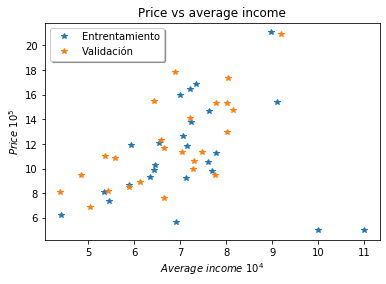

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Datos
data = pd.read_csv("T1_Housing.csv") 
X = data["Avg Area Income"]
Y = data["Price"]
# Entrenamiento.
xEnt = data[data["In Sample"] == 1]["Avg Area Income"]
yEnt = data[data["In Sample"] == 1]["Price"]
# Validación.
xVal = data[data["In Sample"] == 0]["Avg Area Income"]
yVal = data[data["In Sample"] == 0]["Price"]


def plotData():
    plt.plot(xEnt/10000, yEnt/100000, "*", label="Entrentamiento")
    plt.plot(xVal/10000, yVal/100000, "*", label="Validación")
    plt.legend(loc='upper left', shadow=True, fontsize='10')
    plt.title("Price vs average income")
    plt.xlabel("$Average\ income\ 10^4$")
    plt.ylabel("$Price\ 10^5$")
    plt.show()

def reg_lineal(X,Y,rho):
    """
    in:
    out:
    """
    X = np.array(X).reshape(len(X), 1)
    Y = np.array(Y).reshape(len(Y), 1)
    unos = np.ones(len(X)).reshape(len(X),1)
    xTilda = np.concatenate([X, unos], 1)
    I = np.identity(2)
    theta = np.linalg.inv(np.dot(xTilda.transpose(), xTilda) + rho * I)
    theta = np.dot(theta, np.dot(xTilda.transpose(), Y))
    return theta
    
def plotParam():
    """
    Usa datos de entrenamiento para obtener parámetros.
    """
    p = 10 #Valores de rho.
    x = np.arange(p + 1)
    a = []
    b = []
    for rho in x:
        a.append(reg_lineal(xEnt, yEnt, rho)[0])
        b.append(reg_lineal(xEnt, yEnt, rho)[1])
    plt.plot(x, a, "*")
    plt.title("Parámetros vs rho")
    plt.xlabel("Rho")
    plt.ylabel("Parámetro a")
    plt.show()
    plt.plot(x, b, "*")
    plt.title("Parámetros vs rho")
    plt.xlabel("Rho")
    plt.ylabel("Parámetro b")
    plt.show()

def ecm(x,y,theta):
    """
    Calcula el error cuadrático medio.
    in y: 1D DataFrame con los valores de salida observados.
    in x: 1D DataFrame con los valores de entrada observados. len(x) = len(y).
    in theta: 1D array con los parámetros del modelo.
    out ecm: Double. Error cuadrático medio.
    """
    a, b = theta
    x = np.array(x)
    y = np.array(y)
    ecm = (1/len(x)) * sum((y[i] - a*x[i] - b)**2 for i in np.arange(len(y)))
    return ecm

def plotEcmVar():
    p = 10
    x = np.arange(p + 1)
    arrEcm = []
    for rho in x:
        arrEcm.append(ecm(xEnt, yEnt, reg_lineal(xEnt, yEnt, rho)))
    plt.plot(x, arrEcm, "*")
    plt.show()
    
def plotModelo():
    p = 11
    for rho in np.arange(p):
        a = reg_lineal(xEnt, yEnt, rho)[0] #Optimizar
        b = reg_lineal(xEnt, yEnt, rho)[1]
        yGorro = []
        for x in xEnt:
            yGorro.append(a*x + b) 
        plt.plot(xEnt, yGorro)
    plt.plot(X, Y, "*") 
    plt.show()

plotData()
#plotParam()
#plotEcmVar()
#plotModelo()


